# Local Group Halo Properties: Demo Inference

We approximate the local group distance, radial velocity and proper motion likelihood function by sampling from the posterior distributions for these variables reported in the literature and transforming to kinematic variables in the M31-centric coordinate system.

In [1]:
%matplotlib inline
import localgroup
import triangle
import sklearn
from sklearn import mixture
import numpy as np
import pickle
import matplotlib.patches as mpatches

Inside the Likelihood object is a "triplet" object called T, which contains an array of sample local groups, each with kinematic parameters consistent with the observational data. Let's plot these kinematic parameters in a "triangle" figure, to show all their 1 and 2-D marginal distributions.

In [2]:
L = localgroup.Likelihood(isPair=False)
L.generate(Nsamples=200000)

Inside method: heliocentric_equatorial_spherical_to_galactocentric_cartesian
l =  [ 121.17440269  121.17440269  121.17440269 ...,  121.17440269  121.17440269
  121.17440269]
b =  [-21.57299867 -21.57299867 -21.57299867 ..., -21.57299867 -21.57299867
 -21.57299867]
mu_l = -125.296744 +/- 30.853764
mu_b = -73.747001 +/- 28.430251
v_west:  125.296744 +/- 30.853764
v_north: -73.747001 +/- 28.430251
xh, yh, zh, vxh, vyh, vzh =  [-0.38493633 -0.38952429 -0.37212746 ..., -0.36935882 -0.35001648
 -0.34497262] [ 0.63624675  0.64383001  0.61507546 ...,  0.61049928  0.57852905
  0.57019224] [-0.29401873 -0.29752306 -0.28423517 ..., -0.28212045 -0.26734655
 -0.26349399] [ 58.11159441  36.80297351  48.44688847 ...,  30.11732992  33.81801628
  40.03963291] [-326.58394644 -328.94828948 -316.70813945 ..., -304.49472899 -343.64973373
 -347.51308518] [ 126.76482189   36.2660831   103.33754763 ...,   84.05932309   36.92313156
   29.73162203]
Inside method: heliocentric_equatorial_spherical_to_galactocent

localgroup/halo.py:135: RuntimeWarning: invalid value encountered in divide
  self.v_r = (self.x*self.vx + self.y*self.vy + self.z*self.vz)/self.D


In [3]:
L.set_PDF(mixture.GMM(n_components=10, covariance_type='full'))
L.approximate()

Quantiles:
[(0.16, 0.73429148969855451), (0.5, 0.77396784570748989), (0.84, 0.81376282079895024)]
Quantiles:
[(0.16, -119.83210988826332), (0.5, -109.05709947536684), (0.84, -98.237706920628895)]
Quantiles:
[(0.16, 18.871045793356704), (0.5, 37.648879248379096), (0.84, 61.17593647370299)]
Quantiles:
[(0.16, 0.19996405032892742), (0.5, 0.20630155000419531), (0.84, 0.21479388693376075)]
Quantiles:
[(0.16, -182.93569151092478), (0.5, -136.31975750942701), (0.84, -88.624333309480306)]
Quantiles:
[(0.16, 91.776385777213832), (0.5, 124.40997116991628), (0.84, 157.77579546304923)]
Quantiles:
[(0.16, 0.039682991291648262), (0.5, 0.049489535101334692), (0.84, 0.059264698039979982)]
Quantiles:
[(0.16, 33.446287218068477), (0.5, 59.262008754032792), (0.84, 85.035660290697081)]
Quantiles:
[(0.16, 185.37297930882653), (0.5, 339.70259046825845), (0.84, 525.75502437681735)]


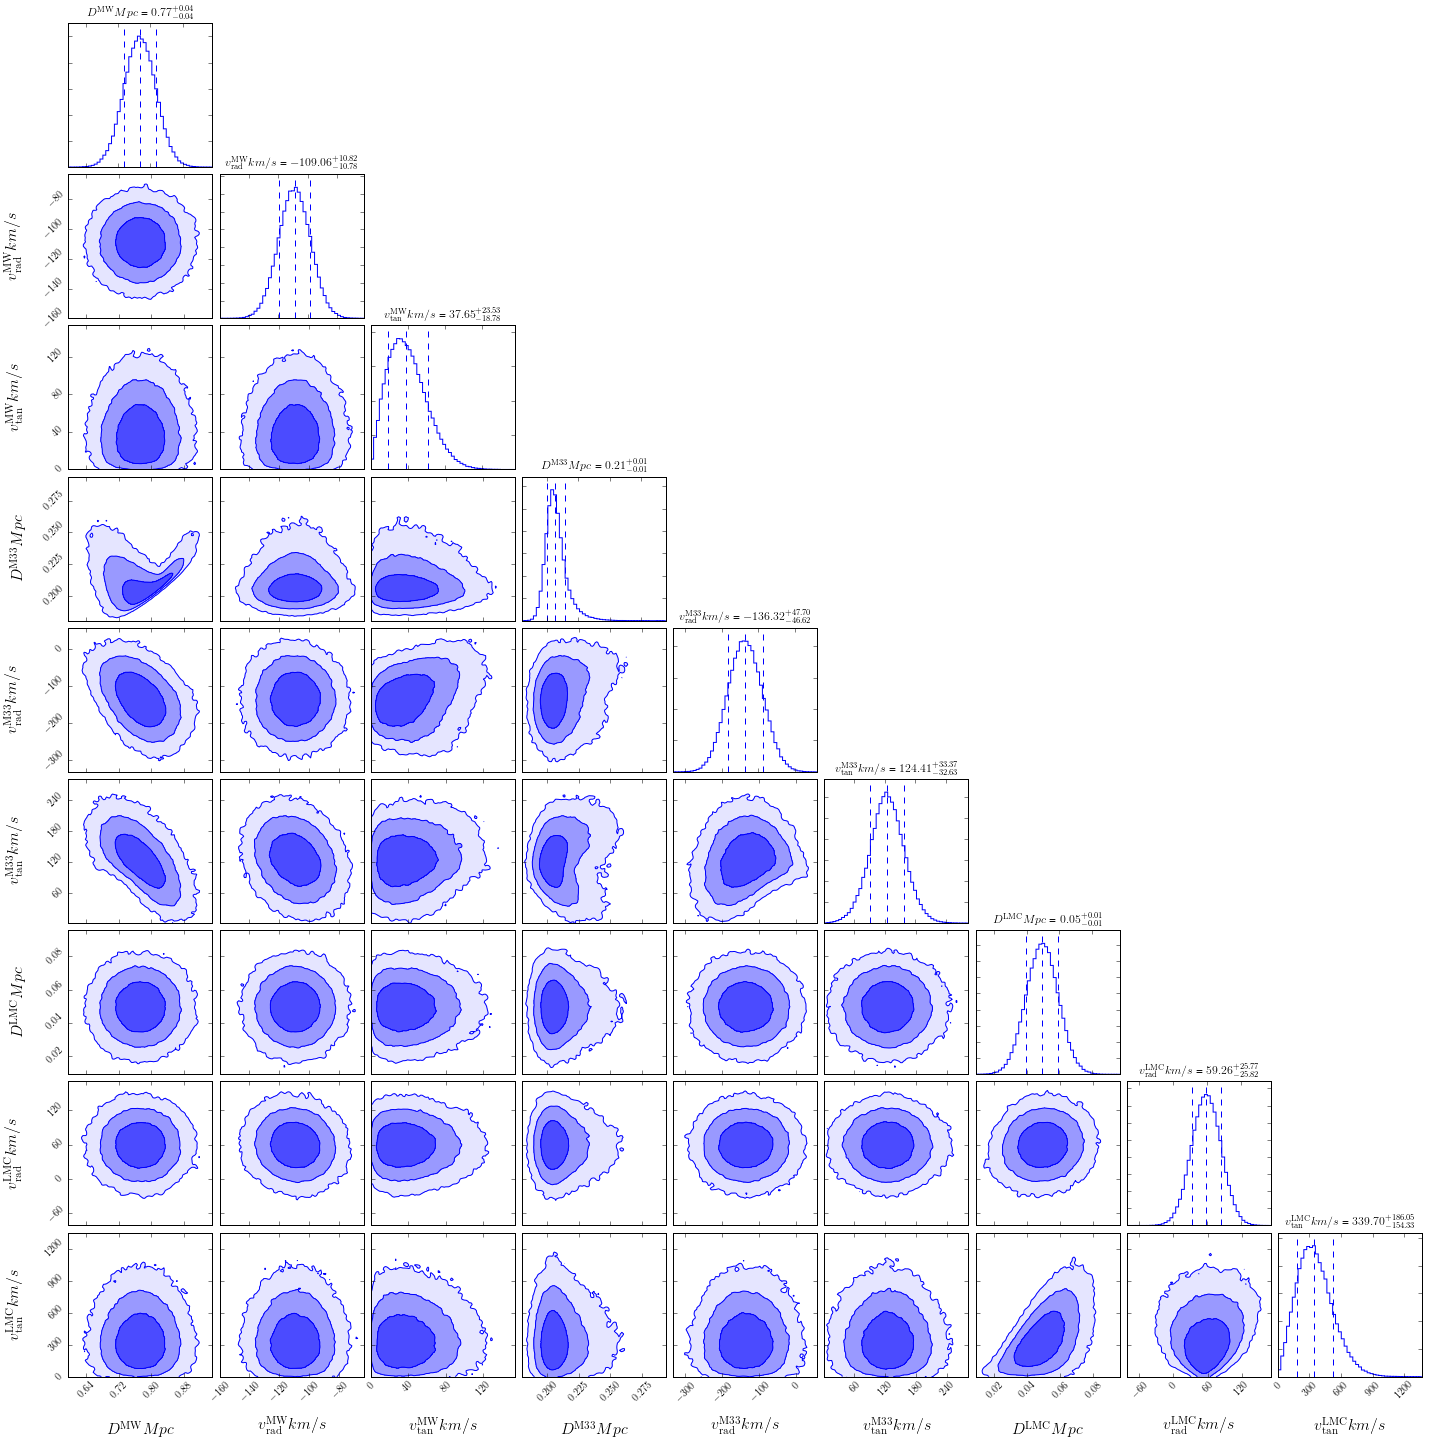

In [4]:
figure_obs = L.plot_samples(10, color='b', overlay=False)

The above plot shows a Gaussian Mixture model fitted Gaussians. The shaded regions show two standard deviations. The samples data has been preprocessed to zero the mean and scale by standard deviation. Since we are using the Gaussian Mixture Model to model the underlying PDF of the data, more components is always better. 

# How to evaluate goodness of fit:

Due to lack of a standard goodness of fit test for GMM's, the best we can do is graphically show that the model reproduces the data well. We proceed by drawing a set of points from the fitted model, where each point is a local group with (MW_D, MW_vr, MW_vt, M33_D, M33_vr, M33_vt). We then plot the 1D and 2D marginalizations of the drawn point set and show that the marginalizations match the marginalizations of the true data.

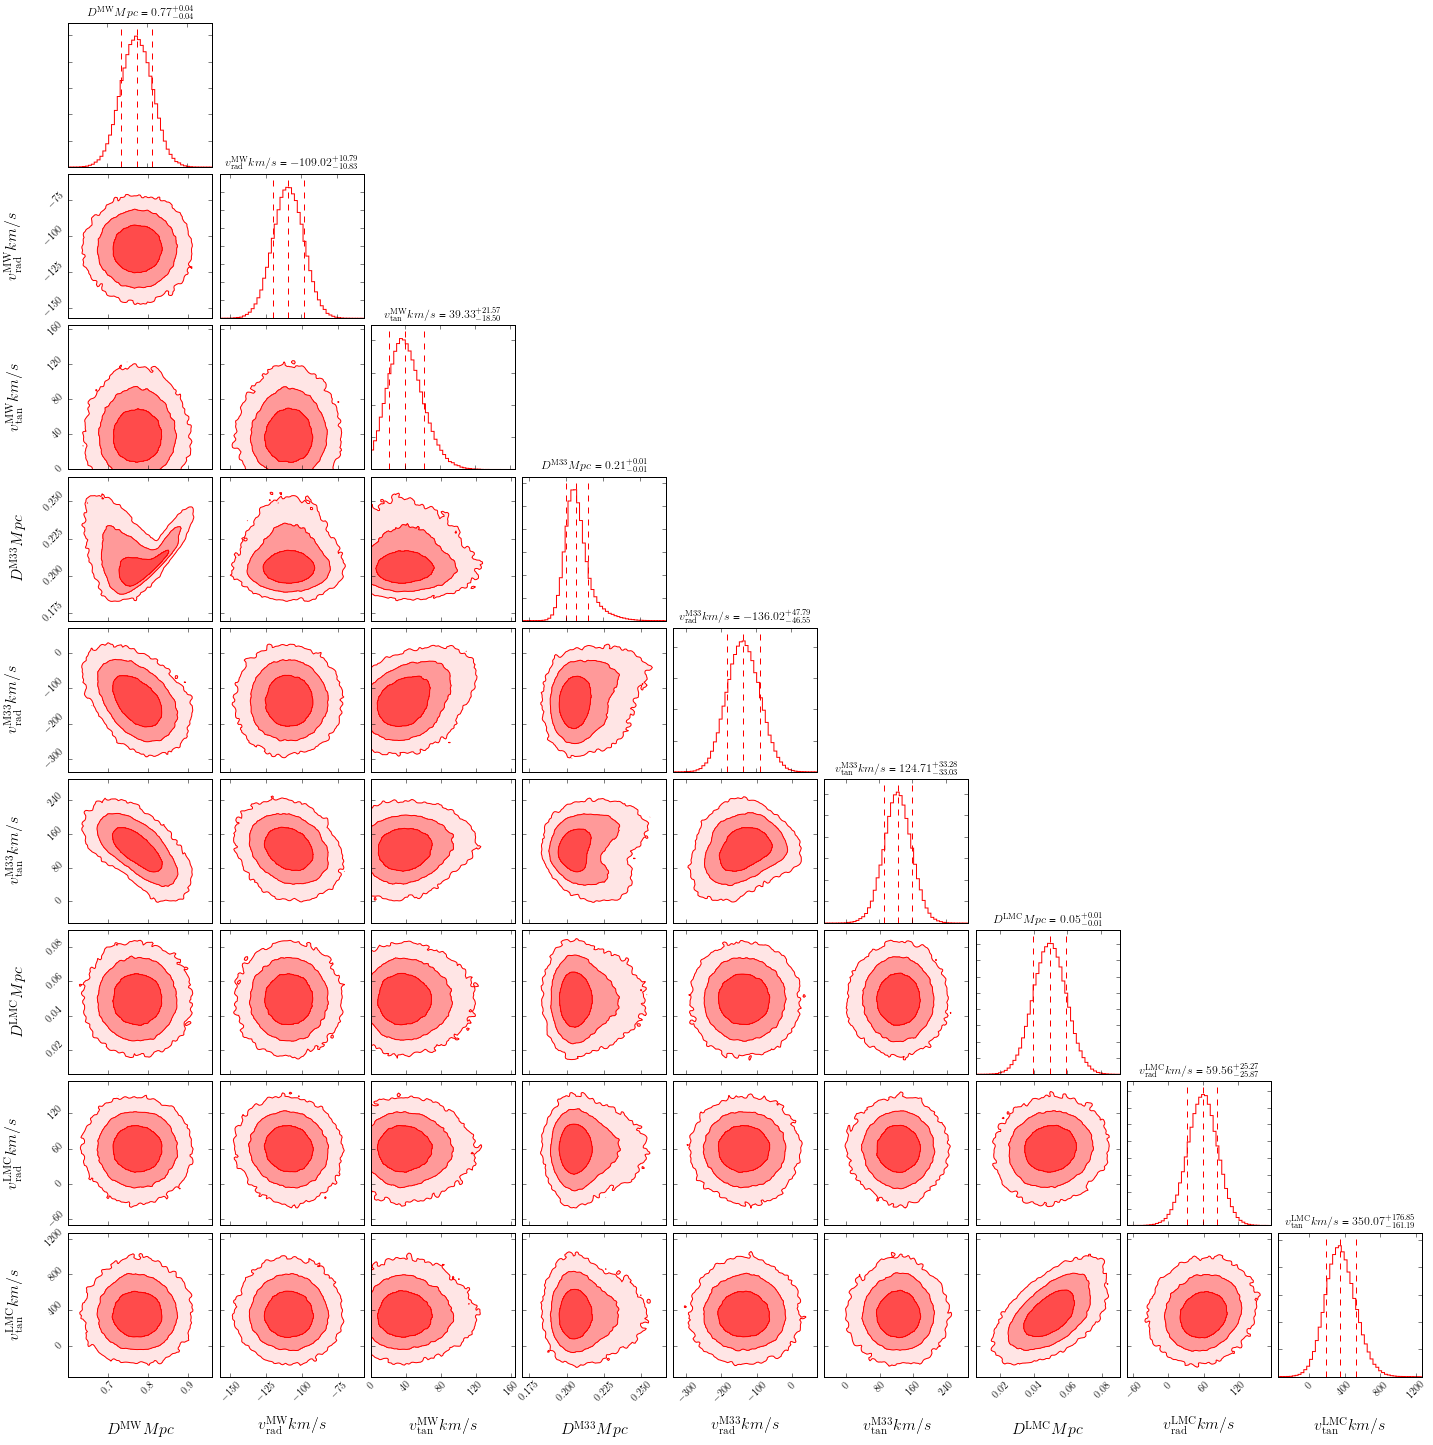

In [5]:
figure_model = L.model_gof(L.T.Nsamples, color="r", fig=None)

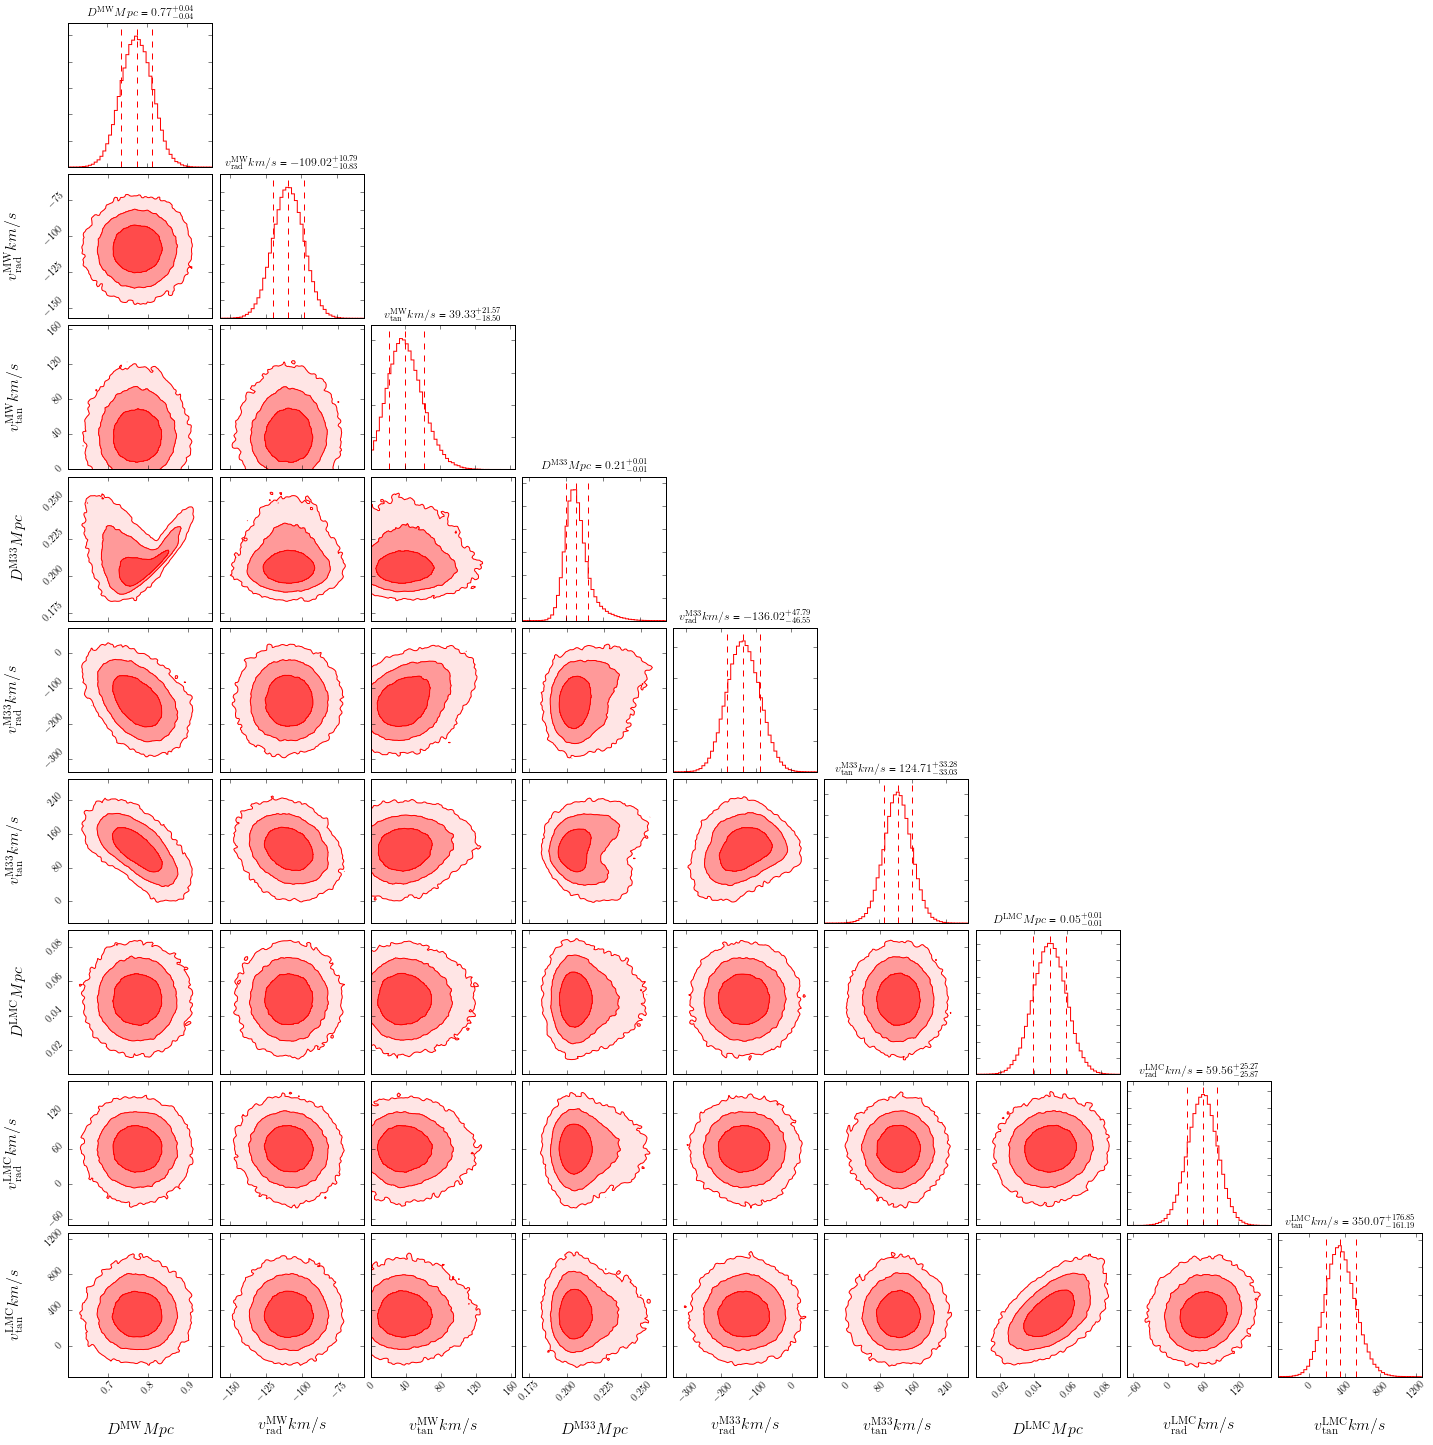

In [6]:
figure_model

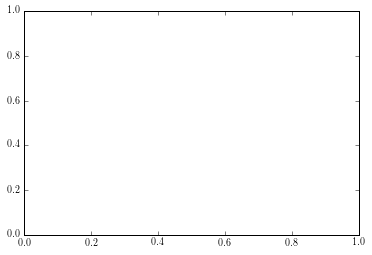

In [7]:
L.model_gof(L.T.Nsamples, color="r", fig=figure_obs)
red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')
figure_obs.legend(handles=[red_patch, blue_patch], labels=["Model Generated", "Observation Generated"], fontsize=16)

In [8]:
figure_obs.suptitle("Likelihood Model Goodness of Fit", fontsize=16)

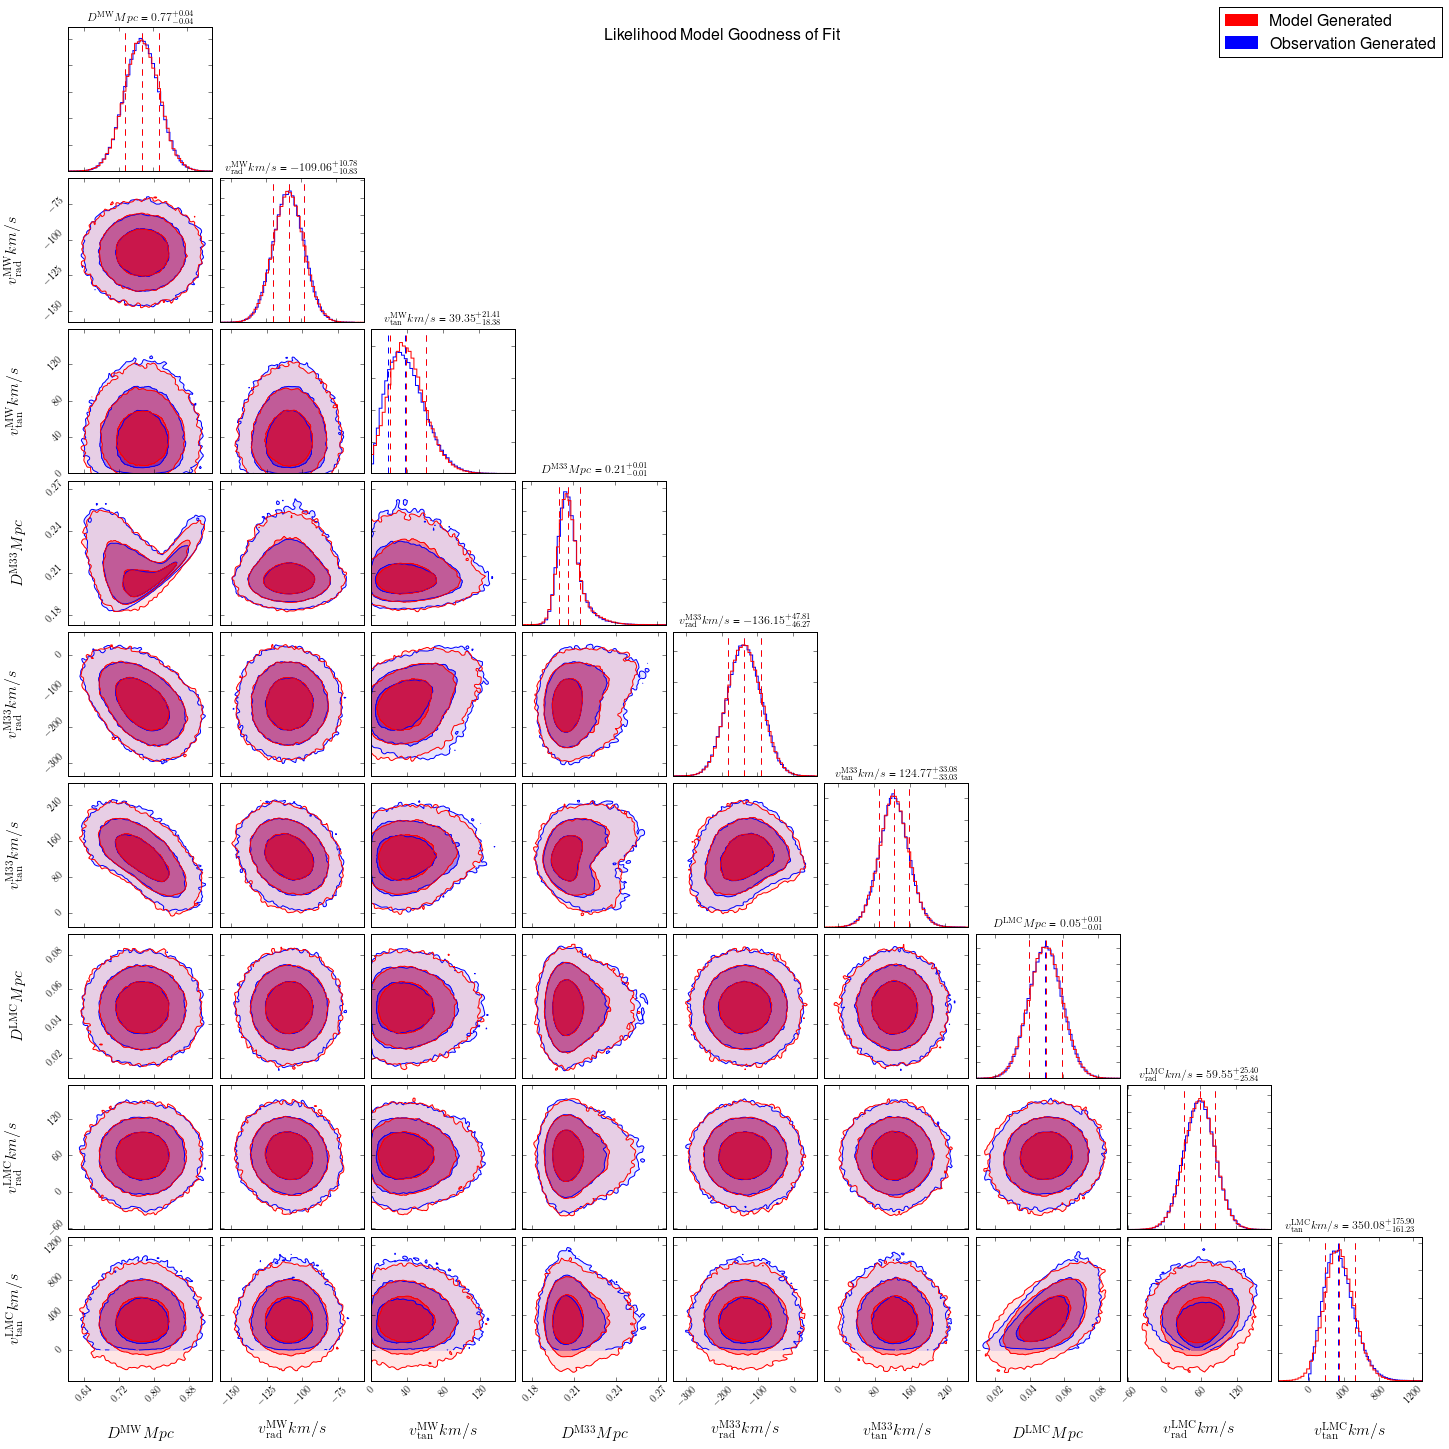

In [9]:
figure_obs

The above plot shows that the points drawn from the model create a population that is very similar to the true data.

In [10]:
#figure_obs.savefig("/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/doc/thesis/plots/final_plots/Trip_LGMM_GOF.pdf", dpi=1200)

# Reading Simulation Points:

Below we read the preconfigured files containing the Consuelo (soon to be Dark Sky) Local Group analogs into a Triplet object. We plot the marginalizations of the simulation data, which allows us to compare with the LG prior.

In [11]:
path = '/lustre/ki/pfs/mwillia1/LG_project/Consuelo_Boxes/All_Boxes_quad_dat_M31_larger.npy'
#path = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/data_files/complete_triplets.txt'
#path_054 = '/lustre/ki/pfs/mwillia1/LG_project/Consuelo_Boxes/All_Boxes_trip_dat_M31_larger_0.949.npy'

npoints = 200000
halo_props = ['MW_Mvir', 'M31_Mvir', 'M33_Mvir']

In [15]:
h=np.load(path)

In [16]:
h.size

208303

In [12]:
Tr = localgroup.Triplet(isPair=False)
#Tr_054 = localgroup.Triplet(isPair=True)

Tr.read_sim_points(path, npoints, halo_props, h=0.7, a=1.0, npy=True)
#Tr_054.read_sim_points(path_054, npoints, halo_props, h=0.7, a=0.949, npy=True)

In [13]:
Tr.transform_to_M31(sim=True)
#Tr_054.transform_to_M31(sim=True)

In [25]:
Tr.sim_samples = np.vstack((Tr.sim_samples, Tr_054.sim_samples))
Tr.MW.Mvir = np.hstack((Tr.MW.Mvir, Tr_054.MW.Mvir))
Tr.M31.Mvir = np.hstack((Tr.M31.Mvir, Tr_054.M31.Mvir))
#Tr.M33.Mvir = np.hstack((Tr.M33.Mvir, Tr_054.M33.Mvir))

Tr.MW.Rvir = np.hstack((Tr.MW.Rvir, Tr_054.MW.Rvir))
Tr.M31.Rvir = np.hstack((Tr.M31.Rvir, Tr_054.M31.Rvir))
#Tr.M33.Rvir = np.hstack((Tr.M33.Rvir, Tr_054.M33.Rvir))

Tr.MW.Rs = np.hstack((Tr.MW.Rs, Tr_054.MW.Rs))
Tr.M31.Rs = np.hstack((Tr.M31.Rs, Tr_054.M31.Rs))
#Tr.M33.Rs = np.hstack((Tr.M33.Rs, Tr_054.M33.Rs))

Tr.MW.Cvir = np.hstack((Tr.MW.Cvir, Tr_054.MW.Cvir))
Tr.M31.Cvir = np.hstack((Tr.M31.Cvir, Tr_054.M31.Cvir))
#Tr.M33.Cvir = np.hstack((Tr.M33.Cvir, Tr_054.M33.Cvir))

Tr.LG_Mvir = np.hstack((Tr.LG_Mvir, Tr_054.LG_Mvir))

In [14]:
Tr.sim_samples.shape

(200000, 9)

In [15]:
#Tr.mass_filter('sim')

sim_sample length before:  (200000, 9)
sim_sample length after:  (199165, 9)


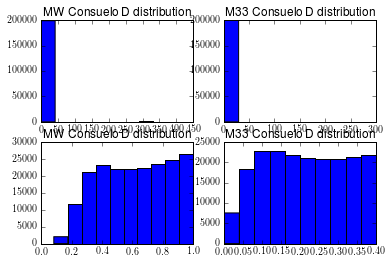

In [14]:
Tr.dist_filter((Tr.sim_samples[:,0] < 10) & (Tr.sim_samples[:,3] < 10) & (Tr.sim_samples[:,6] < 10))
#Tr.dist_filter((Tr.sim_samples[:,0] < 10))

In [29]:
max(Tr.sim_samples[:,3])

IndexError: index 3 is out of bounds for axis 1 with size 3

In [15]:
Tr.preprocess(L.samples_means, L.samples_stds, mode='sim')

Quantiles:
[(0.16, 0.34646228897063547), (0.5, 0.62297148972403704), (0.84, 0.88925503233776904)]
Quantiles:
[(0.16, -286.08113965055702), (0.5, -140.37810851710825), (0.84, -47.226124238963671)]
Quantiles:
[(0.16, 43.184987721531115), (0.5, 104.02834034069357), (0.84, 223.6890457442278)]
Quantiles:
[(0.16, 0.09156469494441441), (0.5, 0.21265448679488308), (0.84, 0.34120775350631538)]
Quantiles:
[(0.16, -242.12655297667692), (0.5, -76.10164668212559), (0.84, 132.07964900853005)]
Quantiles:
[(0.16, 67.372699203034273), (0.5, 163.80832592453888), (0.84, 334.8622228947732)]
Quantiles:
[(0.16, 0.11131875621786969), (0.5, 0.25068759301571042), (0.84, 0.35784023578434931)]
Quantiles:
[(0.16, -203.02881942536385), (0.5, -63.106355231636016), (0.84, 67.887479153831507)]
Quantiles:
[(0.16, 62.907959208749816), (0.5, 145.69807490808549), (0.84, 291.52429163378645)]


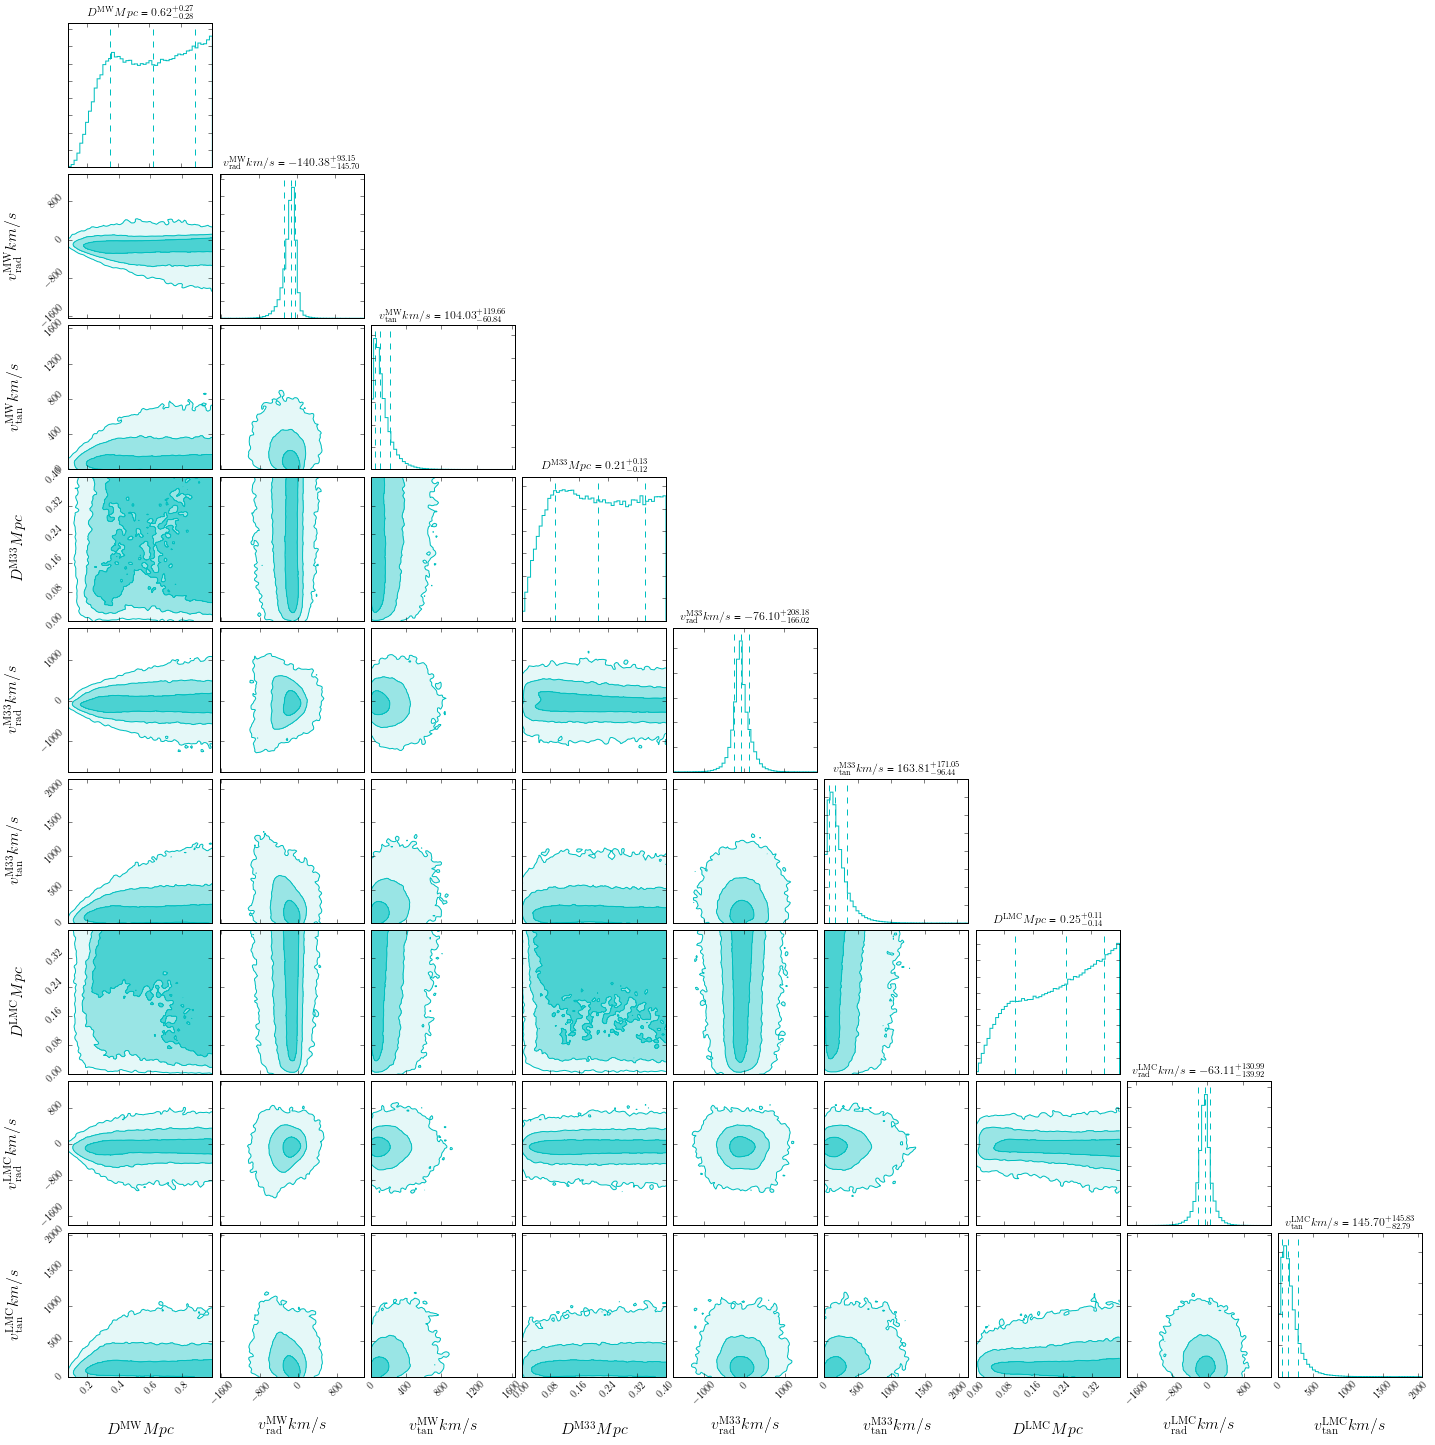

In [16]:
sim_plot = Tr.plot_kinematics('sim', L.samples_means, L.samples_stds, color='c', fig=None)

Quantiles:
[(0.16, 0.34646228897063547), (0.5, 0.62297148972403704), (0.84, 0.88925503233776904)]
Quantiles:
[(0.16, -286.08113965055702), (0.5, -140.37810851710825), (0.84, -47.226124238963671)]
Quantiles:
[(0.16, 43.184987721531115), (0.5, 104.02834034069357), (0.84, 223.6890457442278)]
Quantiles:
[(0.16, 0.09156469494441441), (0.5, 0.21265448679488308), (0.84, 0.34120775350631538)]
Quantiles:
[(0.16, -242.12655297667692), (0.5, -76.10164668212559), (0.84, 132.07964900853005)]
Quantiles:
[(0.16, 67.372699203034273), (0.5, 163.80832592453888), (0.84, 334.8622228947732)]
Quantiles:
[(0.16, 0.11131875621786969), (0.5, 0.25068759301571042), (0.84, 0.35784023578434931)]
Quantiles:
[(0.16, -203.02881942536385), (0.5, -63.106355231636016), (0.84, 67.887479153831507)]
Quantiles:
[(0.16, 62.907959208749816), (0.5, 145.69807490808549), (0.84, 291.52429163378645)]


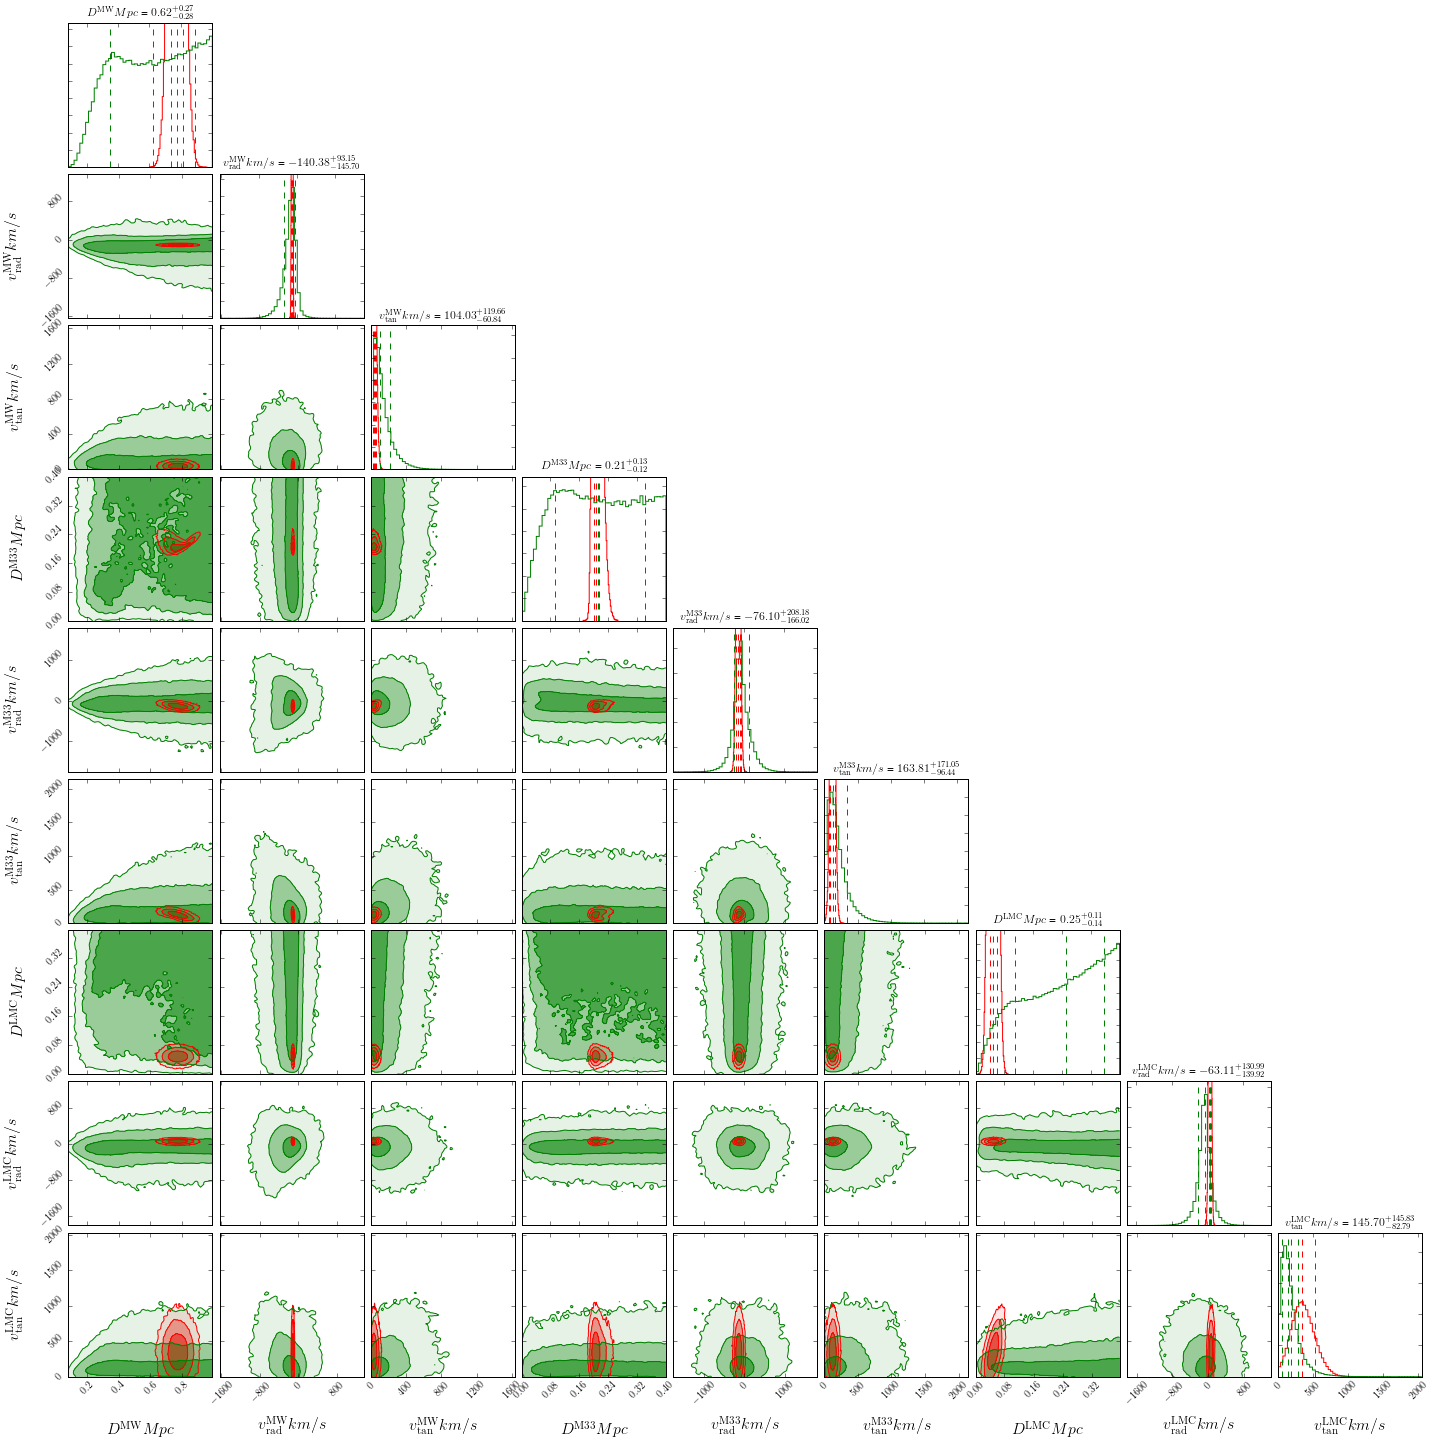

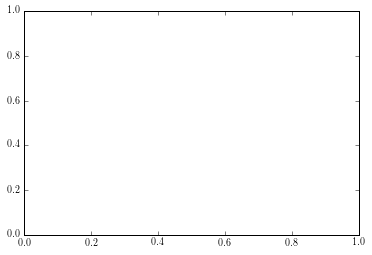

In [17]:
Tr.plot_kinematics('sim', L.samples_means, L.samples_stds, color='g', fig=figure_model)

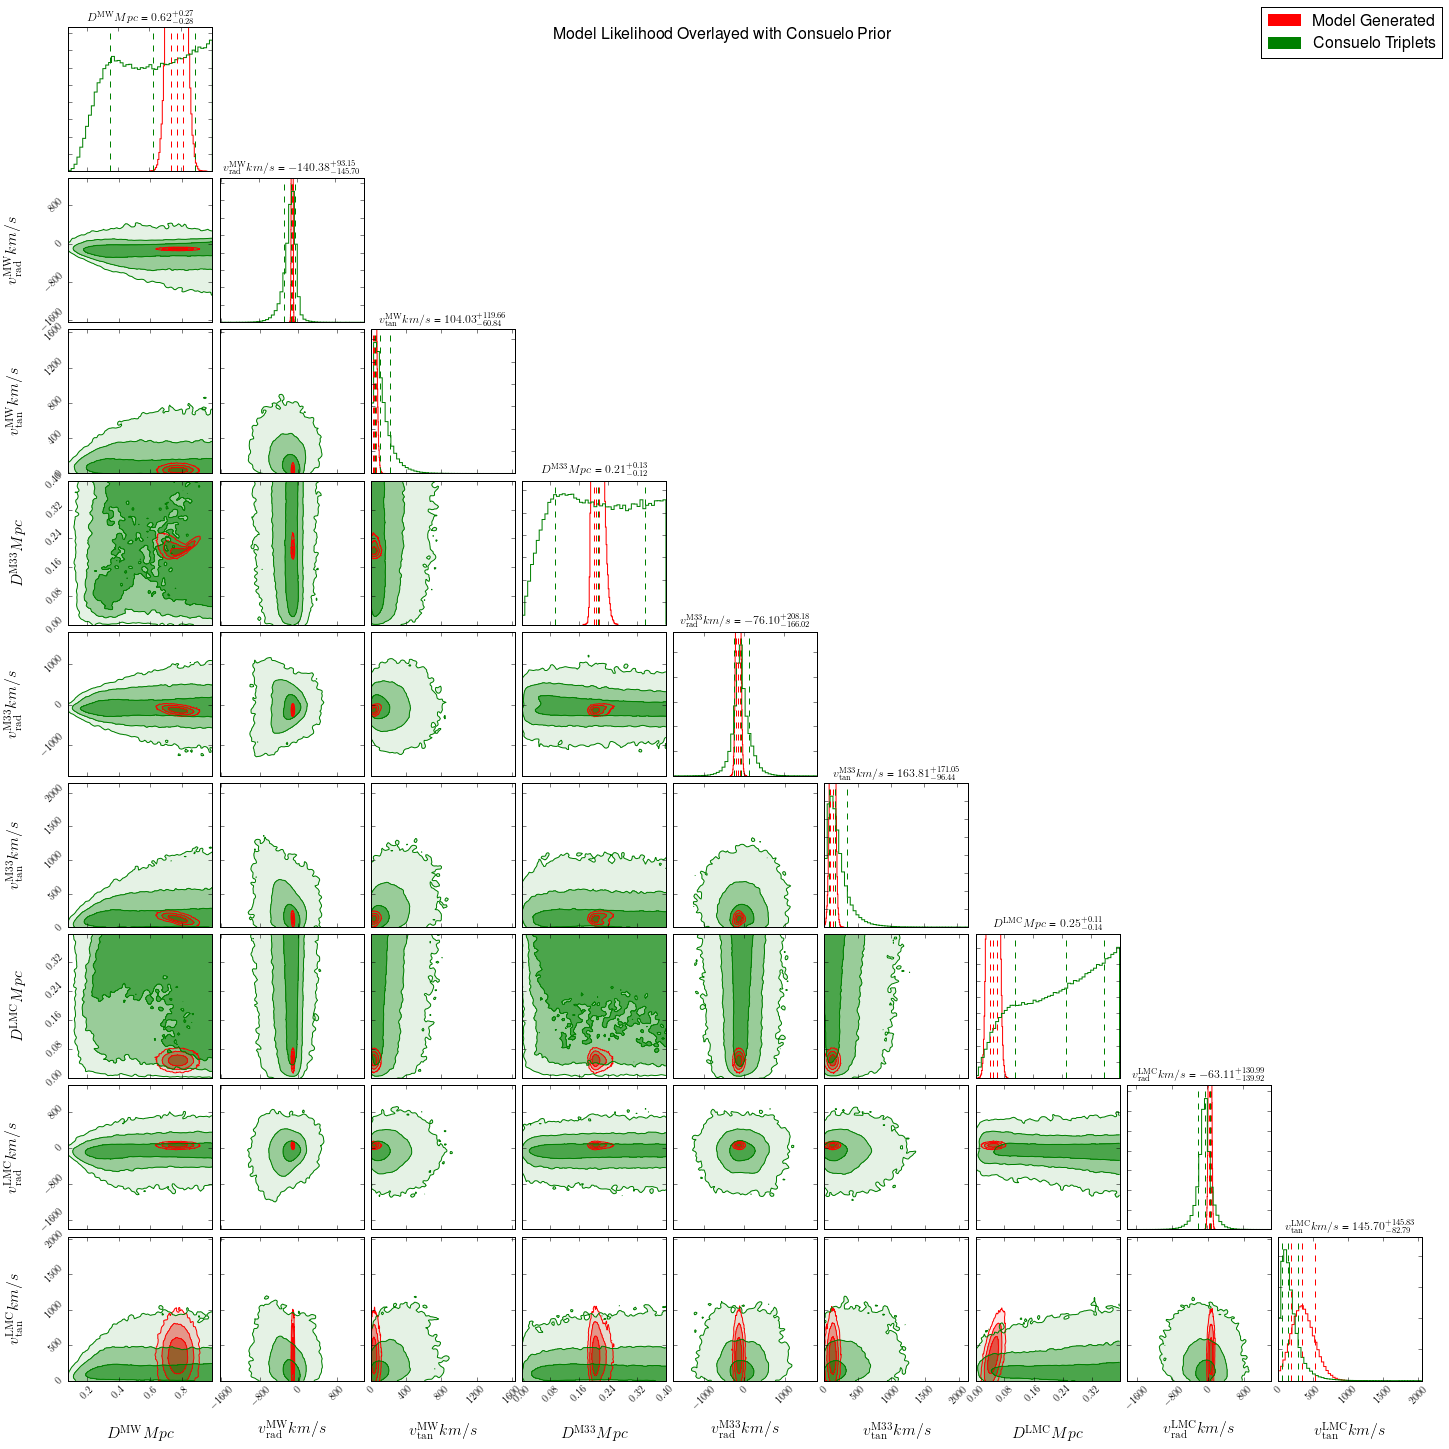

In [18]:
red_patch = mpatches.Patch(color='red')
green_patch = mpatches.Patch(color='green')
figure_model.legend(handles=[red_patch, green_patch], labels=["Model Generated", "Consuelo Triplets"], fontsize=16)
figure_model.suptitle("Model Likelihood Overlayed with Consuelo Prior", fontsize=16)
figure_model

In [19]:
#sim_plot.savefig('/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/doc/thesis/plots/asurps/likelihood_prior.png', dpi=1200)

In [22]:
Tr.compute_model_weights(L, "sim")

In [23]:
N95 = Tr.calculate_N95()
N95

(6, 0.011706006917355792)

In [11]:
Tr.weights[Tr.weights[:]>.024797]

array([ 0.31230457,  0.0671544 ,  0.02491648,  0.37146084,  0.06006868,
        0.12755218,  0.03086875])

In [15]:
MW_C200 = Tr.calculate_cvir_to_c200(Tr.MW.Cvir)
M31_C200 = Tr.calculate_cvir_to_c200(Tr.M31.Cvir)
M33_C200 = Tr.calculate_cvir_to_c200(Tr.M33.Cvir)

MW_M200 = Tr.calculate_Mvir_to_M200(Tr.MW.Mvir, Tr.MW.Cvir, MW_C200)
M31_M200 = Tr.calculate_Mvir_to_M200(Tr.M31.Mvir, Tr.M31.Cvir, M31_C200)
M33_M200 = Tr.calculate_Mvir_to_M200(Tr.M33.Mvir, Tr.M33.Cvir, M33_C200)

total_200 = M31_M200+MW_M200

In [20]:
#m33 = np.ones(len(Tr.MW.Mvir))
#m33[0]=1.5
#m33[1]=.5
total = Tr.MW.Mvir + Tr.M31.Mvir
all_mvir = np.log10(np.transpose(np.vstack((Tr.MW.Mvir, Tr.M31.Mvir, Tr.M33.Mvir, total))))
#all_mvir = np.log10(np.transpose(np.vstack((MW_M200, M31_M200, M33_M200, total_200))))
#labs = ["$M200_{MW}$", "$M200_{M31}$", "$M200_{M33}$", "$M_{MW+M31}$"]
labs = ["$Mvir_{MW}$", "$Mvir_{M31}$", "$Mvir_{M33}$", "$M_{MW+M31}$"]

In [56]:
all_mvir = np.transpose(np.vstack((Tr.MW.Cvir, Tr.M31.Cvir, Tr.M33.Cvir)))
labs = ["$Cvir_{MW}$", "$Cvir_{M31}$", "$Cvir_{M33}$"]

In [19]:
all_mvir.shape

(298830, 3)

Quantiles:
[(0.16, 10.940392925174667), (0.5, 11.451707570865903), (0.84, 12.015602977024132)]
Quantiles:
[(0.16, 11.253713842978014), (0.5, 11.850828522970316), (0.84, 12.493067150644926)]
Quantiles:
[(0.16, 10.335300129946841), (0.5, 10.72064916069974), (0.84, 11.279204106008279)]
Quantiles:
[(0.16, 11.45528833327813), (0.5, 12.021401034440489), (0.84, 12.628223689433176)]


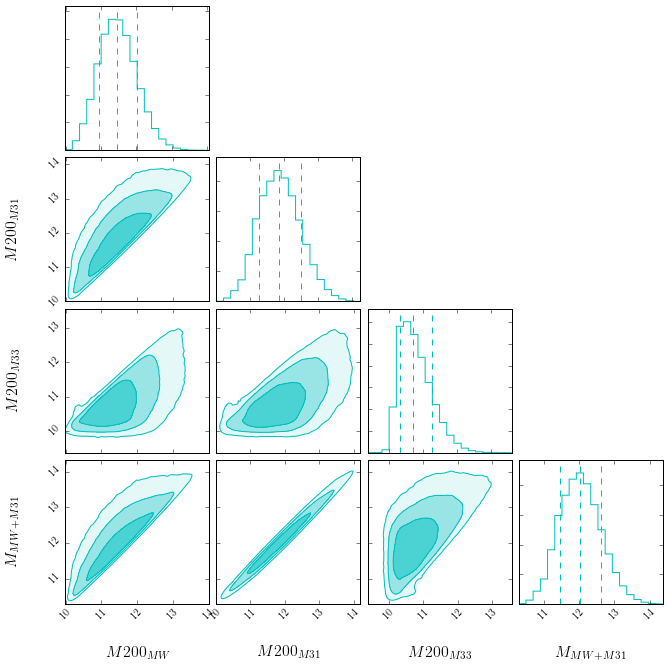

In [20]:
figure2 = triangle.corner(all_mvir, labels=labs, quantiles=[0.16,0.5,0.84], fig=None, weights=None,\
                         plot_contours=True, show_titles=False, title_args={"fontsize": 16}, label_args={"fontsize": 16},\
                         plot_datapoints=False, bins=20, color='c', alpha=0.1)
#figure.suptitle("Weighted Mass Posterior PDF", fontsize=16, horizontalalignment='left')

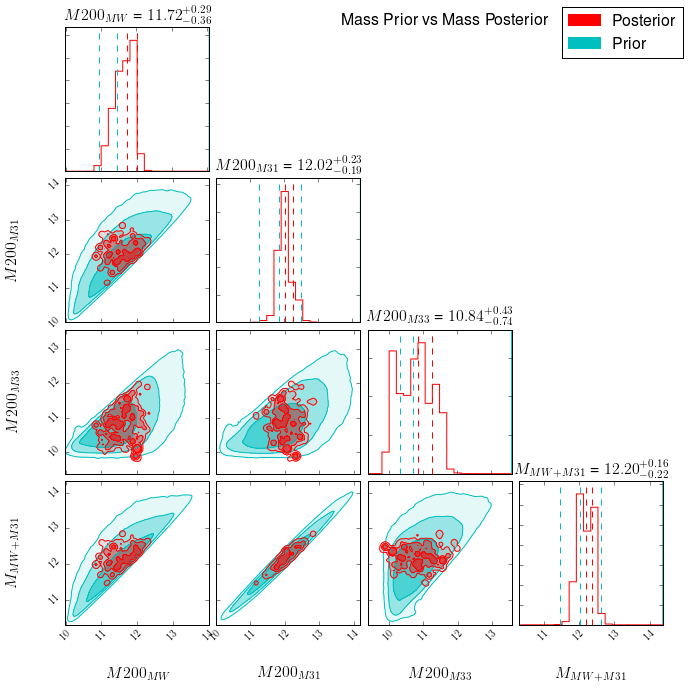

In [25]:
figure2

In [28]:
figure2.savefig('/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/doc/thesis/plots/final_plots/W_vs_UW_Mass_Post.png', dpi=1200)

Quantiles:
[(0.16, 11.836235475134568), (0.5, 11.836235475134568), (0.84, 11.985920220123568)]
Quantiles:
[(0.16, 11.943049111008406), (0.5, 11.943049111008406), (0.84, 12.076822423342774)]
Quantiles:
[(0.16, 11.004364371107751), (0.5, 11.004364371107751), (0.84, 11.004364371107751)]
Quantiles:
[(0.16, 12.19394786349483), (0.5, 12.19394786349483), (0.84, 12.355106552954492)]


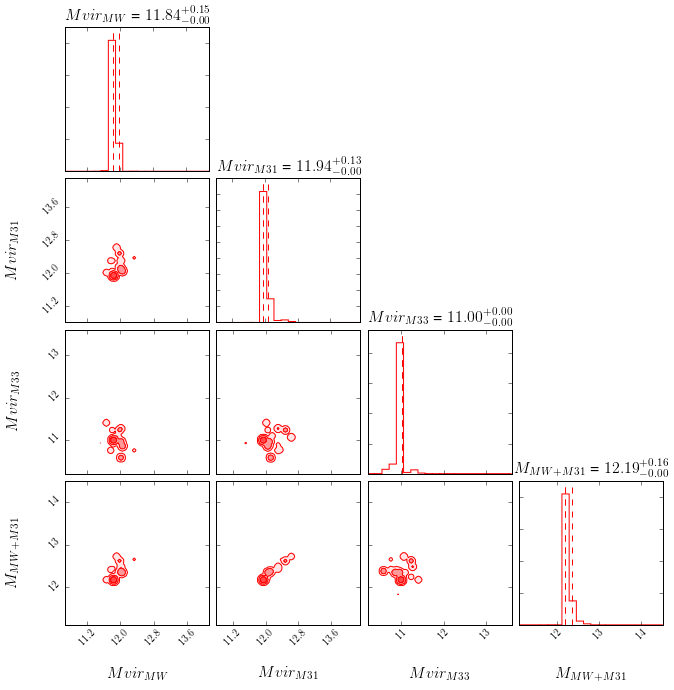

In [21]:
figure = triangle.corner(all_mvir, labels=labs, quantiles=[0.16,0.5,0.84], fig=None, weights=Tr.weights,\
                         plot_contours=True, show_titles=True, title_args={"fontsize": 16}, label_args={"fontsize": 16},\
                         plot_datapoints=False, bins=20, color='r')
#figure.suptitle("Mass Posterior", fontsize=16, horizontalalignment='left')

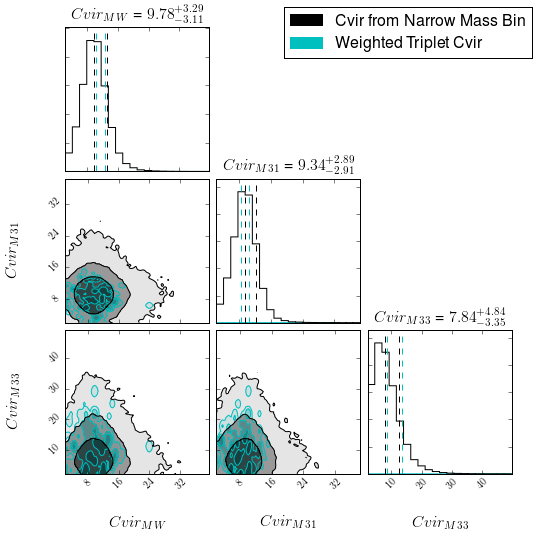

In [63]:
figure

In [62]:
#figure.suptitle("Concentration Posterior", fontsize=16, horizontalalignment='left')
red_patch = mpatches.Patch(color='k')
blue_patch = mpatches.Patch(color='c')
figure.legend(handles=[red_patch, blue_patch], labels=["Cvir from Narrow Mass Bin", "Weighted Triplet Cvir"], fontsize=16)

In [65]:
figure.savefig('/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/doc/thesis/plots/final_plots/TC_vs_MBC.png', dpi=1200)

In [29]:
h = np.load('/lustre/ki/pfs/mwillia1/LG_project/Consuelo_Boxes/4002/4002hlist.npy')

In [47]:
mw_h = h[np.abs(np.log10(h['mvir'])-11.7) < .1]
m31_h = h[np.abs(np.log10(h['mvir'])-12) < .1]
m33_h = h[np.abs(np.log10(h['mvir'])-10.8) < .1]

In [51]:
mwc = mw_h['rvir']/mw_h['rs']
m31c = m31_h['rvir']/m31_h['rs']
m33c = m33_h['rvir']/m33_h['rs']

mwc.shape, m31c.shape, m33c.shape

((217665,), (117899,), (1122183,))

In [52]:
mwc = mwc[0:100000]
m31c = m31c[0:100000]
m33c = m33c[0:100000]

In [58]:
all_mvir = np.transpose(np.vstack((mwc, m31c, m33c)))
labs = ["$Cvir_{MW}$", "$Cvir_{M31}$", "$Cvir_{M33}$"]

Quantiles:
[(0.0, 2.1626035287540142), (0.5, 9.7768424877369338), (0.84, 13.064559736233724)]
Quantiles:
[(0.0, 2.1626225121906293), (0.5, 9.3402476001345551), (0.84, 12.231018804621753)]
Quantiles:
[(0.0, 2.1626365992465333), (0.5, 7.8392154432181913), (0.84, 12.678848920863308)]


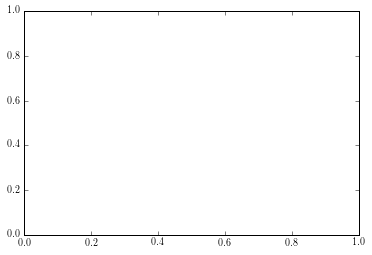

In [59]:
figure_c = triangle.corner(all_mvir, labels=labs, quantiles=[0.,0.5,0.84], fig=figure, weights=None,\
                         plot_contours=True, show_titles=True, title_args={"fontsize": 16}, label_args={"fontsize": 16},\
                         plot_datapoints=False, bins=20, color='k')

Quantiles:
[(0.16, 11.431572818585654), (0.5, 11.800785790327762), (0.84, 12.0893751608161)]
Quantiles:
[(0.16, 11.906550519101451), (0.5, 12.106360908806751), (0.84, 12.338137628331909)]
Quantiles:
[(0.16, 10.263896330604611), (0.5, 10.930745328311113), (0.84, 11.348207476685626)]
Quantiles:
[(0.16, 12.060180155027432), (0.5, 12.280305143255005), (0.84, 12.448350701995903)]


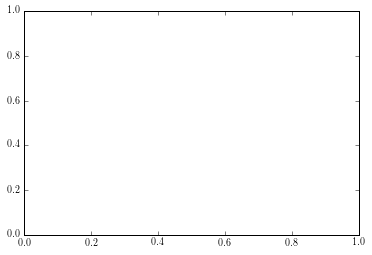

In [206]:
figure2 = triangle.corner(all_mvir, labels=labs, quantiles=[0.16,0.5,0.84], fig=figure, weights=Tr.weights,\
                         plot_contours=True, show_titles=True, title_args={"fontsize": 16}, label_args={"fontsize": 16},\
                         plot_datapoints=False, bins=20, color='r')

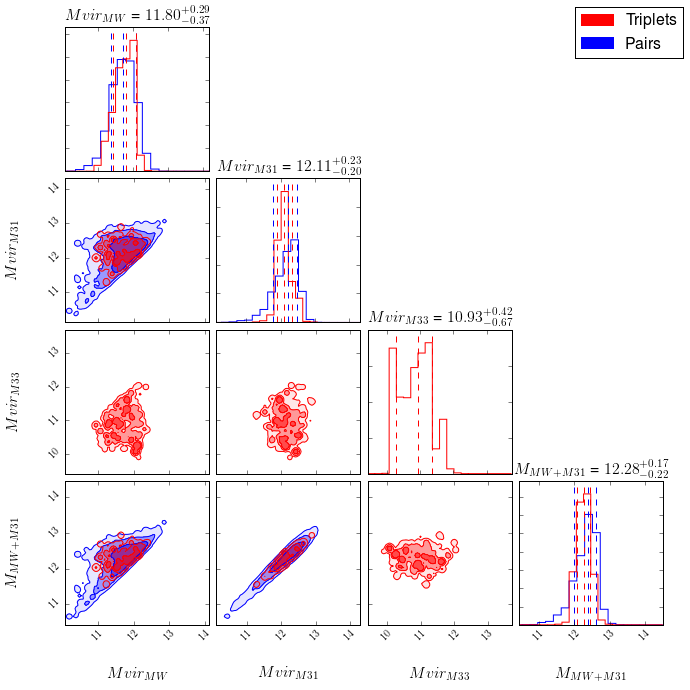

In [209]:
figure

In [208]:
#figure.suptitle("Mass Posterior", fontsize=16, horizontalalignment='left')
red_patch = mpatches.Patch(color='r')
blue_patch = mpatches.Patch(color='b')
figure.legend(handles=[red_patch, blue_patch], labels=["Triplets", "Pairs"], fontsize=16)

In [134]:
a=figure.gca()

In [138]:
a.legend_?

In [211]:
figure2.savefig('/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/doc/thesis/plots/final_plots/T_vs_P_mass.png', dpi=1200)

In [48]:
Tr.weights.shape

(123382,)

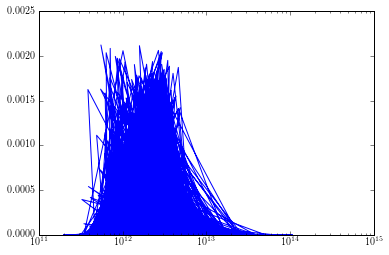

In [66]:
xdata = total
plot(xdata, Tr.weights)
xscale('log')

In [67]:
bins = 20
xbins = np.logspace(np.log10(xdata.min()), np.log10(xdata.max()), bins)
ybins = [np.sum(Tr.weights[(xdata[:]>xbins[i]) & (xdata[:]<xbins[i+1])]) for i in range(bins-1)]
print len(xbins)
print len(ybins)
print len(xbins[:bins-1])

20
19
19


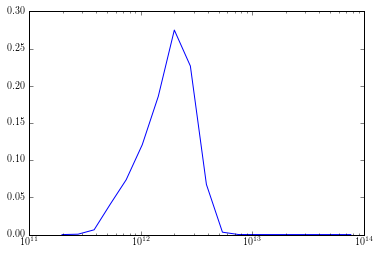

In [68]:
plot(xbins[:bins-1], ybins)
xscale('log')

In [40]:
xtrip = np.copy(xbins[:bins-1])
ytrip = np.copy(ybins)

In [45]:
xtripmw = np.copy(xbins[:bins-1])
ytripmw = np.copy(ybins)

In [65]:
xpairmw = np.copy(xbins[:bins-1])
ypairmw = np.copy(ybins)

In [69]:
xpair = np.copy(xbins[:bins-1])
ypair = np.copy(ybins)

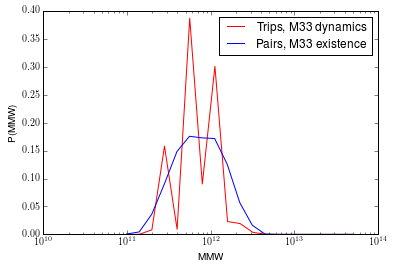

In [80]:
plot(xtripmw, ytripmw, color='r')
plot(xpairmw, ypairmw, color='b')
ylabel('P(MMW)')
xlabel('MMW')

red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')
legend(["Trips, M33 dynamics", "Pairs, M33 existence"])
xscale('log')
#savefig("/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/doc/thesis/plots/pdf_mw_plot.png")